# The battle of the neighborhoods 

## What is the best neighborhood to open a french restaurant?

##### Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 93 kB 3.7 MB/s  eta 0:00:01
Libraries imported.


##### Downloading and creating dataframe over neighborhoods in Paris 

In [2]:
!wget -q -O 'paris_data.json' https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e
print('Data downloaded!')

Data downloaded!


In [3]:
with open('paris_data.json') as json_data:
    paris_data = json.load(json_data)
    
paris_data

[{'datasetid': 'correspondances-code-insee-code-postal',
  'recordid': '2bf36b38314b6c39dfbcd09225f97fa532b1fc45',
  'fields': {'code_comm': '645',
   'nom_dept': 'ESSONNE',
   'statut': 'Commune simple',
   'z_moyen': 121.0,
   'nom_region': 'ILE-DE-FRANCE',
   'code_reg': '11',
   'insee_com': '91645',
   'code_dept': '91',
   'geo_point_2d': [48.750443119964764, 2.251712972144151],
   'postal_code': '91370',
   'id_geofla': '16275',
   'code_cant': '03',
   'geo_shape': {'type': 'Polygon',
    'coordinates': [[[2.238024349288764, 48.735565859837095],
      [2.226414985434264, 48.75003536744732],
      [2.22450256558849, 48.75882853410981],
      [2.232859032169924, 48.76598806763034],
      [2.250043759055985, 48.761213267519565],
      [2.269288614654887, 48.76063999654954],
      [2.276145972515501, 48.75666127305422],
      [2.283691112862691, 48.748081131389654],
      [2.274517407535147, 48.74072222671912],
      [2.238024349288764, 48.735565859837095]]]},
   'superficie': 999.

In [4]:
Borough = []
Neighborhood = []
Longitude = []
Latitude = []


for data in paris_data:
    borough = neighborhood_name = data['fields']['nom_dept']
    neighborhood_name = data['fields']['nom_comm']

    n_coordinates = data['fields']['geo_point_2d']
    neighborhood_lat = n_coordinates[0]
    neighborhood_lon = n_coordinates[1]
    
    Borough.append(borough)
    Neighborhood.append(neighborhood_name)
    Longitude.append(neighborhood_lon)
    Latitude.append(neighborhood_lat)
    
df = pd.DataFrame({'Borough':Borough, 'Neighborhood':Neighborhood, 'Latitude': Latitude, 'Longitude': Longitude})
df

Borough                  Neighborhood   Latitude  Longitude
0               ESSONNE          VERRIERES-LE-BUISSON  48.750443   2.251713
1        SEINE-ET-MARNE          COURCELLES-EN-BASSEE  48.412561   3.052941
2               ESSONNE                     MAUCHAMPS  48.527268   2.197182
3        SEINE-ET-MARNE               LAGNY-SUR-MARNE  48.873070   2.709781
4          VAL-DE-MARNE                       ARCUEIL  48.805880   2.333510
5        SEINE-ET-MARNE                SAINT-HILLIERS  48.628915   3.258236
6        SEINE-ET-MARNE                  SAINT-PATHUS  49.073757   2.787942
7        SEINE-ET-MARNE                        GRESSY  48.965010   2.664404
8              YVELINES                    GUYANCOURT  48.773078   2.076052
9        SEINE-ET-MARNE       SAINT-GERMAIN-SUR-ECOLE  48.474307   2.510782
10              ESSONNE                       MENNECY  48.558624   2.437532
11              ESSONNE                        TORFOU  48.532049   2.234472
12           VAL-D'OISE        SOISY-SOUS-MONTMORENCY  48.988408   2.300500
13       SEINE-ET-MARNE               BOISSISE-LE-ROI  48.511978   2.569919
14       SEINE-ET-MARNE         CONDE-SAINTE-LIBIAIRE  48.898588   2.836399
15       SEINE-ET-MARNE                        SERVON  48.715054   2.591643
16       SEINE-ET-MARNE                          REAU  48.607393   2.623986
17              ESSONNE                ONCY-SUR-ECOLE  48.381935   2.456869
18       SEINE-ET-MARNE                      FONTAINS  48.521763   3.006871
19              ESSONNE         PLESSIS-SAINT-BENOIST  48.445199   2.003050
20       SEINE-ET-MARNE                     PONTCARRE  48.796293   2.707444
21           VAL-D'OISE                         VIGNY  49.080166   1.929923
22           VAL-D'OISE         COURCELLES-SUR-VIOSNE  49.073026   1.996302
23             YVELINES                   NEAUPHLETTE  48.935348   1.542271
24              ESSONNE                    LEUDEVILLE  48.570725   2.327743
25             YVELINES                      MAUREPAS  48.769839   1.924040
26             YVELINES                    ORVILLIERS  48.854810   1.642521
27           VAL-D'OISE          SAINT-CYR-EN-ARTHIES  49.059131   1.741958
28             YVELINES                       LONGNES  48.922857   1.579471
29           VAL-D'OISE               AUVERS-SUR-OISE  49.080386   2.154881
30           VAL-D'OISE              BELLOY-EN-FRANCE  49.092240   2.371761
31           VAL-D'OISE             GRISY-LES-PLATRES  49.133235   2.048461
32       SEINE-ET-MARNE                   MARCHEMORET  49.052855   2.751693
33       SEINE-ET-MARNE              LA CROIX-EN-BRIE  48.594494   3.070940
34       HAUTS-DE-SEINE                        SCEAUX  48.776816   2.295294
35           VAL-D'OISE                       PARMAIN  49.122870   2.201278
36           VAL-D'OISE             BEAUMONT-SUR-OISE  49.140098   2.300213
37       SEINE-ET-MARNE               VALENCE-EN-BRIE  48.446225   2.893071
38             YVELINES                      BOUGIVAL  48.863599   2.137607
39             YVELINES              MONTALET-LE-BOIS  49.048990   1.829961
40              ESSONNE            VAYRES-SUR-ESSONNE  48.431522   2.345691
41             YVELINES                  GOUPILLIERES  48.881116   1.766799
42       SEINE-ET-MARNE                 CLAYE-SOUILLY  48.942970   2.675232
43         VAL-DE-MARNE                          ORLY  48.742932   2.394683
44             YVELINES         ARNOUVILLE-LES-MANTES  48.911007   1.720440
45             YVELINES            LA BOISSIERE-ECOLE  48.689888   1.667755
46       SEINE-ET-MARNE                     COUTENCON  48.472941   2.997284
47              ESSONNE             BRETIGNY-SUR-ORGE  48.602511   2.302162
48       SEINE-ET-MARNE               CREGY-LES-MEAUX  48.977656   2.873691
49       SEINE-ET-MARNE                  FAREMOUTIERS  48.778372   3.000217
50       SEINE-ET-MARNE                      PUISIEUX  49.065414   2.915373
51           VAL-D'OISE                       GROSLAY  48.984970

In [5]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 8 boroughs and 1300 neighborhoods.


In [6]:
print(df['Borough'].unique())

['ESSONNE' 'SEINE-ET-MARNE' 'VAL-DE-MARNE' 'YVELINES' "VAL-D'OISE"
 'HAUTS-DE-SEINE' 'SEINE-SAINT-DENIS' 'PARIS']


In [7]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [8]:
# create map of New York using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [9]:
paris_data = df[df['Borough'] == 'PARIS'].reset_index(drop=True)
paris_data.head()

Borough              Neighborhood   Latitude  Longitude
0   PARIS   PARIS-9E-ARRONDISSEMENT  48.876896   2.337460
1   PARIS   PARIS-2E-ARRONDISSEMENT  48.867903   2.344107
2   PARIS  PARIS-11E-ARRONDISSEMENT  48.859415   2.378741
3   PARIS  PARIS-15E-ARRONDISSEMENT  48.840155   2.293559
4   PARIS   PARIS-3E-ARRONDISSEMENT  48.863054   2.359361

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(paris_data['Borough'].unique()),
        paris_data.shape[0]
    )
)

The dataframe has 1 boroughs and 20 neighborhoods.


In [11]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [12]:
# create map of Manhattan using latitude and longitude values
map_paris1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris1)  
    
map_paris1

In [13]:
CLIENT_ID = '0PNNGX0JGZQRGBOERVBFOG2OQ1SYA5POAYONQAYX1CWG3Y1E' 
CLIENT_SECRET = 'UHUSYWQRA0JBPLCZCBFNFWZYKUECRG4FVZOWIQND14HFCG5O' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0PNNGX0JGZQRGBOERVBFOG2OQ1SYA5POAYONQAYX1CWG3Y1E
CLIENT_SECRET:UHUSYWQRA0JBPLCZCBFNFWZYKUECRG4FVZOWIQND14HFCG5O


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
paris_venues = getNearbyVenues(names=paris_data['Neighborhood'], latitudes =paris_data['Latitude'], longitudes=paris_data['Longitude'])

PARIS-9E-ARRONDISSEMENT
PARIS-2E-ARRONDISSEMENT
PARIS-11E-ARRONDISSEMENT
PARIS-15E-ARRONDISSEMENT
PARIS-3E-ARRONDISSEMENT
PARIS-6E-ARRONDISSEMENT
PARIS-19E-ARRONDISSEMENT
PARIS-20E-ARRONDISSEMENT
PARIS-1ER-ARRONDISSEMENT
PARIS-17E-ARRONDISSEMENT
PARIS-8E-ARRONDISSEMENT
PARIS-13E-ARRONDISSEMENT
PARIS-12E-ARRONDISSEMENT
PARIS-18E-ARRONDISSEMENT
PARIS-5E-ARRONDISSEMENT
PARIS-10E-ARRONDISSEMENT
PARIS-16E-ARRONDISSEMENT
PARIS-4E-ARRONDISSEMENT
PARIS-7E-ARRONDISSEMENT
PARIS-14E-ARRONDISSEMENT


In [16]:
print(paris_venues.shape)
paris_venues.head()

(1817, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
1  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
2  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
3  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
4  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   

                    Venue  Venue Latitude  Venue Longitude  \
0                  So Nat       48.876277         2.338614   
1     Place Saint-Georges       48.878408         2.337575   
2  Le Bouclier de Bacchus       48.876834         2.337843   
3               Aji Dulce       48.877906         2.337878   
4             Caillebotte       48.877118         2.340604   

                  Venue Category  
0  Vegetarian / Vegan Restaurant  
1                          Plaza  
2                       Wine Bar  
3          Venezuelan Restaurant  
4              French Restaurant

##### Number of venues per Neighborhood

In [17]:
paris_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                              
PARIS-10E-ARRONDISSEMENT                    100                     100   
PARIS-11E-ARRONDISSEMENT                    100                     100   
PARIS-12E-ARRONDISSEMENT                     34                      34   
PARIS-13E-ARRONDISSEMENT                    100                     100   
PARIS-14E-ARRONDISSEMENT                    100                     100   
PARIS-15E-ARRONDISSEMENT                    100                     100   
PARIS-16E-ARRONDISSEMENT                     59                      59   
PARIS-17E-ARRONDISSEMENT                    100                     100   
PARIS-18E-ARRONDISSEMENT                    100                     100   
PARIS-19E-ARRONDISSEMENT                     67                      67   
PARIS-1ER-ARRONDISSEMENT                    100                     100   
PARIS-20E-ARRONDISSEMENT                     57                      57   
PARIS-2E-ARRONDISSEMENT                     100                     100   
PARIS-3E-ARRONDISSEMENT                     100                     100   
PARIS-4E-ARRONDISSEMENT                     100                     100   
PARIS-5E-ARRONDISSEMENT                     100                     100   
PARIS-6E-ARRONDISSEMENT                     100                     100   
PARIS-7E-ARRONDISSEMENT                     100                     100   
PARIS-8E-ARRONDISSEMENT                     100                     100   
PARIS-9E-ARRONDISSEMENT                     100                     100   

                          Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                       
PARIS-10E-ARRONDISSEMENT    100             100              100   
PARIS-11E-ARRONDISSEMENT    100             100              100   
PARIS-12E-ARRONDISSEMENT     34              34               34   
PARIS-13E-ARRONDISSEMENT    100             100              100   
PARIS-14E-ARRONDISSEMENT    100             100              100   
PARIS-15E-ARRONDISSEMENT    100             100              100   
PARIS-16E-ARRONDISSEMENT     59              59               59   
PARIS-17E-ARRONDISSEMENT    100             100              100   
PARIS-18E-ARRONDISSEMENT    100             100              100   
PARIS-19E-ARRONDISSEMENT     67              67               67   
PARIS-1ER-ARRONDISSEMENT    100             100              100   
PARIS-20E-ARRONDISSEMENT     57              57               57   
PARIS-2E-ARRONDISSEMENT     100             100              100   
PARIS-3E-ARRONDISSEMENT     100             100              100   
PARIS-4E-ARRONDISSEMENT     100             100              100   
PARIS-5E-ARRONDISSEMENT     100             100              100   
PARIS-6E-ARRONDISSEMENT     100             100              100   
PARIS-7E-ARRONDISSEMENT     100             100              100   
PARIS-8E-ARRONDISSEMENT     100             100              100   
PARIS-9E-ARRONDISSEMENT     100             100              100   

                          Venue Category  
Neighborhood                              
PARIS-10E-ARRONDISSEMENT             100  
PARIS-11E-ARRONDISSEMENT             100  
PARIS-12E-ARRONDISSEMENT              34  
PARIS-13E-ARRONDISSEMENT             100  
PARIS-14E-ARRONDISSEMENT             100  
PARIS-15E-ARRONDISSEMENT             100  
PARIS-16E-ARRONDISSEMENT              59  
PARIS-17E-ARRONDISSEMENT             100  
PARIS-18E-ARRONDISSEMENT             100  
PARIS-19E-ARRONDISSEMENT              67  
PARIS-1ER-ARRONDISSEMENT             100  
PARIS-20E-ARRONDISSEMENT              57  
PARIS-2E-ARRONDISSEMENT              100  
PARIS-3E-ARRONDISSEMENT              100  
PARIS-4E-ARRONDISSEMENT              100  
PARIS-5E-ARRONDISSEMENT              100  
PARIS-6E-ARRONDISSEMENT              100  
PARIS-7E-ARRONDISSEMENT              100  
PARIS-8E-ARRONDISS

In [18]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 220 uniques categories.


##### Analyse each Neighborhood

In [19]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  \
0  PARIS-9E-ARRONDISSEMENT                  0                   0   
1  PARIS-9E-ARRONDISSEMENT                  0                   0   
2  PARIS-9E-ARRONDISSEMENT                  0                   0   
3  PARIS-9E-ARRONDISSEMENT                  0                   0   
4  PARIS-9E-ARRONDISSEMENT                  0                   0   

   American Restaurant  Aquarium  Arcade  Arepa Restaurant  \
0                    0         0       0                 0   
1                    0         0       0                 0   
2                    0         0       0                 0   
3                    0         0       0                 0   
4                    0         0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  \
0                 0          0           0           0       0    0   
1                 0          0           0           0       0    0   
2                 0          0           0           0       0    0   
3                 0          0           0           0       0    0   
4                 0          0           0           0       0    0   

   Basketball Court  Basque Restaurant  Bed & Breakfast  Beer Bar  \
0                 0                  0                0         0   
1                 0                  0                0         0   
2                 0                  0                0         0   
3                 0                  0                0         0   
4                 0                  0                0         0   

   Beer Garden  Beer Store  Bistro  Boat or Ferry  Bookstore  \
0            0           0       0              0          0   
1            0           0       0              0          0   
2            0           0       0              0          0   
3            0           0       0              0          0   
4            0           0       0              0          0   

   Botanical Garden  Boutique  Boxing Gym  Brasserie  Brazilian Restaurant  \
0                 0         0           0          0                     0   
1                 0         0           0          0                     0   
2                 0         0           0          0                     0   
3                 0         0           0          0                     0   
4                 0         0           0          0                     0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Burger Joint  \
0               0        0       0                0             0   
1               0        0       0                0             0   
2               0        0       0                0             0   
3               0        0       0                0             0   
4               0        0       0                0             0   

   Bus Station  Bus Stop  Butcher  Café  Cajun / Creole Restaurant  \
0            0         0        0     0                          0   
1            0         0        0     0                          0   
2            0         0        0     0                          0   
3            0         0        0     0                          0   
4            0         0        0     0                          0   

   Cambodian Restaurant  Canal  Candy Store  Cantonese Restaurant  Cemetery  \
0                     0      0            0                     0         0   
1                     0      0            0                     0         0   
2     

In [20]:
paris_onehot.shape

(1817, 221)

In [21]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0   PARIS-10E-ARRONDISSEMENT               0.00                0.02   
1   PARIS-11E-ARRONDISSEMENT               0.01                0.00   
2   PARIS-12E-ARRONDISSEMENT               0.00                0.00   
3   PARIS-13E-ARRONDISSEMENT               0.00                0.00   
4   PARIS-14E-ARRONDISSEMENT               0.00                0.01   
5   PARIS-15E-ARRONDISSEMENT               0.00                0.00   
6   PARIS-16E-ARRONDISSEMENT               0.00                0.00   
7   PARIS-17E-ARRONDISSEMENT               0.00                0.00   
8   PARIS-18E-ARRONDISSEMENT               0.00                0.01   
9   PARIS-19E-ARRONDISSEMENT               0.00                0.00   
10  PARIS-1ER-ARRONDISSEMENT               0.00                0.00   
11  PARIS-20E-ARRONDISSEMENT               0.00                0.00   
12   PARIS-2E-ARRONDISSEMENT               0.00                0.00   
13   PARIS-3E-ARRONDISSEMENT               0.00                0.00   
14   PARIS-4E-ARRONDISSEMENT               0.00                0.00   
15   PARIS-5E-ARRONDISSEMENT               0.00                0.00   
16   PARIS-6E-ARRONDISSEMENT               0.00                0.00   
17   PARIS-7E-ARRONDISSEMENT               0.00                0.00   
18   PARIS-8E-ARRONDISSEMENT               0.00                0.00   
19   PARIS-9E-ARRONDISSEMENT               0.00                0.00   

    American Restaurant  Aquarium  Arcade  Arepa Restaurant  \
0                  0.00  0.000000    0.00              0.00   
1                  0.00  0.000000    0.00              0.00   
2                  0.00  0.029412    0.00              0.00   
3                  0.00  0.000000    0.00              0.00   
4                  0.00  0.000000    0.00              0.00   
5                  0.00  0.000000    0.00              0.00   
6                  0.00  0.000000    0.00              0.00   
7                  0.01  0.000000    0.00              0.00   
8                  0.00  0.000000    0.00              0.01   
9                  0.00  0.000000    0.00              0.00   
10                 0.00  0.000000    0.00              0.00   
11                 0.00  0.000000    0.00              0.00   
12                 0.01  0.000000    0.00              0.00   
13                 0.00  0.000000    0.00              0.00   
14                 0.00  0.000000    0.00              0.00   
15                 0.00  0.000000    0.00              0.00   
16                 0.01  0.000000    0.00              0.00   
17                 0.00  0.000000    0.00              0.00   
18                 0.00  0.000000    0.00              0.00   
19                 0.01  0.000000    0.01              0.00   

    Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.00         0.00    0.000000             0.000000   
1                     0.00         0.01    0.010000             0.000000   
2                     0.00         0.00    0.000000             0.000000   
3                     0.00         0.00    0.000000             0.000000   
4                     0.00         0.00    0.020000             0.000000   
5                     0.00         0.00    0.000000             0.010000   
6                     0.00         0.00    0.033898             0.000000   
7                     0.00         0.00    0.000000             0.000000   
8                     0.01         0.02    0.010000             0.000000   
9                     0.00         0.00    0.000000             0.014925   
10                    0.00         0.00    0.040000             0.010000   
11                    0.00         0.00    0.000000             0.000000   
12                    0.00         0.00    0.000000             0.000000   
13                    0.01         0.04    0.020000             0.000000   
14                    0.00         0.01    0.010000         

In [22]:
paris_grouped.shape

(20, 221)

In [23]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----PARIS-10E-ARRONDISSEMENT----
               venue  freq
0  French Restaurant  0.15
1        Coffee Shop  0.05
2        Pizza Place  0.04
3  Indian Restaurant  0.04
4             Bakery  0.03


----PARIS-11E-ARRONDISSEMENT----
               venue  freq
0  French Restaurant  0.14
1         Restaurant  0.05
2       Cocktail Bar  0.05
3             Bistro  0.05
4               Café  0.04


----PARIS-12E-ARRONDISSEMENT----
               venue  freq
0  French Restaurant  0.12
1               Lake  0.09
2       Tram Station  0.06
3             Bakery  0.06
4               Café  0.06


----PARIS-13E-ARRONDISSEMENT----
                   venue  freq
0  Vietnamese Restaurant  0.15
1        Thai Restaurant  0.13
2       Asian Restaurant  0.09
3      French Restaurant  0.08
4     Chinese Restaurant  0.05


----PARIS-14E-ARRONDISSEMENT----
                   venue  freq
0      French Restaurant  0.24
1                  Hotel  0.10
2     Italian Restaurant  0.06
3    Japanese Restaurant  0.04


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
paris_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
paris_neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_neighborhoods_venues_sorted.head()

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0  PARIS-10E-ARRONDISSEMENT      French Restaurant           Coffee Shop   
1  PARIS-11E-ARRONDISSEMENT      French Restaurant                Bistro   
2  PARIS-12E-ARRONDISSEMENT      French Restaurant                  Lake   
3  PARIS-13E-ARRONDISSEMENT  Vietnamese Restaurant       Thai Restaurant   
4  PARIS-14E-ARRONDISSEMENT      French Restaurant                 Hotel   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0     Indian Restaurant           Pizza Place                 Bistro   
1            Restaurant          Cocktail Bar                   Café   
2          Tram Station                Bakery                   Café   
3      Asian Restaurant     French Restaurant                  Hotel   
4    Italian Restaurant   Japanese Restaurant  Vietnamese Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Asian Restaurant                 Hotel                Bakery   
1           Pizza Place                   Bar    Italian Restaurant   
2           Zoo Exhibit        Sandwich Place     Recreation Center   
3    Chinese Restaurant                Bakery   Japanese Restaurant   
4                Bistro           Pizza Place                   Bar   

  9th Most Common Venue 10th Most Common Venue  
0          Cocktail Bar              Wine Shop  
1           Coffee Shop              Bookstore  
2                  Pool                  Plaza  
3                Bistro   Cambodian Restaurant  
4                Bakery             Restaurant

##### Cluster Neighborhoods in Paris

In [26]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 2, 1, 1, 1, 1, 4, 0], dtype=int32)

In [27]:
# add clustering labels
paris_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head() 

Borough              Neighborhood   Latitude  Longitude  Cluster Labels  \
0   PARIS   PARIS-9E-ARRONDISSEMENT  48.876896   2.337460               1   
1   PARIS   PARIS-2E-ARRONDISSEMENT  48.867903   2.344107               0   
2   PARIS  PARIS-11E-ARRONDISSEMENT  48.859415   2.378741               0   
3   PARIS  PARIS-15E-ARRONDISSEMENT  48.840155   2.293559               1   
4   PARIS   PARIS-3E-ARRONDISSEMENT  48.863054   2.359361               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     French Restaurant                 Hotel              Wine Bar   
1     French Restaurant              Wine Bar                 Hotel   
2     French Restaurant                Bistro            Restaurant   
3     French Restaurant                 Hotel    Italian Restaurant   
4           Coffee Shop          Burger Joint              Wine Bar   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0    Italian Restaurant                 Plaza                Bakery   
1   Japanese Restaurant    Italian Restaurant      Pedestrian Plaza   
2          Cocktail Bar                  Café           Pizza Place   
3                  Park                Bakery   Japanese Restaurant   
4           Art Gallery                 Hotel        Clothing Store   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0          Cocktail Bar           Pizza Place           Cheese Shop   
1                   Bar                Bakery          Cocktail Bar   
2                   Bar    Italian Restaurant           Coffee Shop   
3    Persian Restaurant           Pizza Place           Coffee Shop   
4                Bakery          Cocktail Bar    Italian Restaurant   

  10th Most Common Venue  
0           Concert Hall  
1             Restaurant  
2              Bookstore  
3      Korean Restaurant  
4              Bookstore

In [28]:
# create map
paris_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(paris_map_clusters)
       
paris_map_clusters

In [29]:
paris_merged

Borough              Neighborhood   Latitude  Longitude  Cluster Labels  \
0    PARIS   PARIS-9E-ARRONDISSEMENT  48.876896   2.337460               1   
1    PARIS   PARIS-2E-ARRONDISSEMENT  48.867903   2.344107               0   
2    PARIS  PARIS-11E-ARRONDISSEMENT  48.859415   2.378741               0   
3    PARIS  PARIS-15E-ARRONDISSEMENT  48.840155   2.293559               1   
4    PARIS   PARIS-3E-ARRONDISSEMENT  48.863054   2.359361               0   
5    PARIS   PARIS-6E-ARRONDISSEMENT  48.848968   2.332671               0   
6    PARIS  PARIS-19E-ARRONDISSEMENT  48.886869   2.384694               0   
7    PARIS  PARIS-20E-ARRONDISSEMENT  48.863187   2.400820               4   
8    PARIS  PARIS-1ER-ARRONDISSEMENT  48.862630   2.336293               0   
9    PARIS  PARIS-17E-ARRONDISSEMENT  48.887337   2.307486               1   
10   PARIS   PARIS-8E-ARRONDISSEMENT  48.872527   2.312583               1   
11   PARIS  PARIS-13E-ARRONDISSEMENT  48.828718   2.362468               2   
12   PARIS  PARIS-12E-ARRONDISSEMENT  48.835156   2.419807               3   
13   PARIS  PARIS-18E-ARRONDISSEMENT  48.892735   2.348712               4   
14   PARIS   PARIS-5E-ARRONDISSEMENT  48.844509   2.349859               0   
15   PARIS  PARIS-10E-ARRONDISSEMENT  48.876029   2.361113               0   
16   PARIS  PARIS-16E-ARRONDISSEMENT  48.860399   2.262100               1   
17   PARIS   PARIS-4E-ARRONDISSEMENT  48.854228   2.357362               0   
18   PARIS   PARIS-7E-ARRONDISSEMENT  48.856083   2.312439               1   
19   PARIS  PARIS-14E-ARRONDISSEMENT  48.828993   2.327101               1   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0       French Restaurant                 Hotel              Wine Bar   
1       French Restaurant              Wine Bar                 Hotel   
2       French Restaurant                Bistro            Restaurant   
3       French Restaurant                 Hotel    Italian Restaurant   
4             Coffee Shop          Burger Joint              Wine Bar   
5       French Restaurant                 Plaza    Italian Restaurant   
6       French Restaurant                   Bar                 Plaza   
7                     Bar     French Restaurant                Bakery   
8     Japanese Restaurant                 Hotel                 Plaza   
9       French Restaurant    Italian Restaurant                 Hotel   
10                  Hotel     French Restaurant                Garden   
11  Vietnamese Restaurant       Thai Restaurant      Asian Restaurant   
12      French Restaurant                  Lake          Tram Station   
13      French Restaurant                   Bar                Bistro   
14      French Restaurant                 Plaza                Bakery   
15      French Restaurant           Coffee Shop     Indian Restaurant   
16      French Restaurant                Bakery    Italian Restaurant   
17      French Restaurant                 Plaza          Cocktail Bar   
18      French Restaurant                 Hotel    Italian Restaurant   
19      French Restaurant                 Hotel    Italian Restaurant   

   4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0     Italian Restaurant                  Plaza                Bakery   
1    Japanese Restaurant     Italian Restaurant      Pedestrian Plaza   
2           Cocktail Bar                   Café           Pizza Place   
3                   Park                 Bakery   Japanese Restaurant   
4            Art Gallery                  Hotel        Clothing Store   
5                 Garden               Wine Bar           Pastry Shop   
6                   Café                  Hotel           Pizza Place   
7                 Bistro                Theater                 Plaza   
8      French Restaurant             Art Museum    Italian Restaurant   
9                 Bakery             Restaurant                  Park   
10              Boutique   

##### Search for French Restaurants in neighborhood PARIS-13E-ARRONDISSEMENT

In [30]:
address = '44 Rue Charles Moureu, 75013 Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8287679, 2.3610987.


In [31]:
search_query = 'French Restaurant'
radius = 1500
print(search_query + ' .... OK!')

French Restaurant .... OK!


In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()

# assign relevant part of JSON to venues
venues_paris = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues_paris)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


id                           name  \
0  54e21134498e89ccb3333ad4                    French Eyes   
1  4db7061143a1369cb5f3513a                       Nenuphar   
2  5693f81e498e575c63ec142b  FrenchFrogs Bootcamp Training   
3  5bab4a64ccad6b00392c7d7d            French Tech Central   
4  4ba383c2f964a5207d4338e3    @sanja@french-lifestyle.com   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d16e941735', 'name': 'F...  v-1607340524    False   
1  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1607340524    False   
2  [{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...  v-1607340524    False   
3  [{'id': '4bf58dd8d48988d174941735', 'name': 'C...  v-1607340524    False   
4  [{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...  v-1607340524    False   

              location.address  location.lat  location.lng  \
0         131 avenue de France     48.831147      2.375246   
1         155 avenue de Choisy     48.828460      2.360899   
2                          NaN     48.828008      2.362867   
3  55 boulevard Vincent Auriol     48.833935      2.370979   
4            64-80 rue Clisson     48.830087      2.365533   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 48.83114696814524...               1070   
1  [{'label': 'display', 'lat': 48.82846, 'lng': ...                 37   
2  [{'label': 'display', 'lat': 48.82800842429962...                154   
3  [{'label': 'display', 'lat': 48.833935, 'lng':...                924   
4  [{'label': 'display', 'lat': 48.83008734, 'lng...                356   

  location.postalCode location.cc location.city location.state  \
0               75013          FR         Paris  Île-de-France   
1               75013          FR         Paris  Île-de-France   
2                 NaN          FR           NaN            NaN   
3                 NaN          FR           NaN            NaN   
4               75013          FR         Paris  Île-de-France   

  location.country                    location.formattedAddress  \
0           France  [131 avenue de France, 75013 Paris, France]   
1           France  [155 avenue de Choisy, 75013 Paris, France]   
2           France                                     [France]   
3           France        [55 boulevard Vincent Auriol, France]   
4           France     [64-80 rue Clisson, 75013 Paris, France]   

  location.crossStreet venuePage.id  
0                  NaN          NaN  
1                  NaN          NaN  
2                  NaN          NaN  
3                  NaN          NaN  
4                  NaN          NaN

In [33]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name  \
0                                         French Eyes   
1                                            Nenuphar   
2                       FrenchFrogs Bootcamp Training   
3                                 French Tech Central   
4                         @sanja@french-lifestyle.com   
5            Restaurant Universitaire Tolbiac (CROUS)   
6                                Paris French Cantine   
7   Restaurant Universitaire Halle aux Farines (CR...   
8                            Restaurant Gaston Acurio   
9                                                 RAB   
10                                 Restaurant Venezia   
11                                       Café O'Jules   
12               Université Paris VII – Paris-Diderot   
13                                Restaurant Bosphore   
14           Raviolis Chinois 如意饺子 (Raviolis Chinois)   
15                                         Miraflores   
16                              Le 28 Cafe Restaurant   
17                                   Restaurant Agraf   
18                    Pivoine [Restaurant Vietnamien]   
19          Restaurant universitaire Crous de Censier   
20                                            Manolya   
21                           Cafétéria Grands Moulins   
22                            Restaurant Mediterranée   
23                                       Hippopotamus   
24                                     LatinoGourmand   
25                            Restaurant Le Diplomate   
26                               Restaurant du Campus   
27                                         Chheng Sim   
28                                 Le Dung Restaurant   
29                                          Le Myndos   
30                                Restaurant Victoria   
31                                                GAP   
32                                   Restaurant Paris   
33                                             Norouz   
34                                      Long Hoa 龍華小館   
35                                             Éphèse   
36                                 P-7 Bar/Restaurant   
37                    Accenture Restaurant Entreprise   
38                                         Hawai Ivry   
39                                                Iki   
40                                           Bibimbap   
41                                               RATP   
42                                         Baan Issan   
43                                Restaurant Istanbul   
44                                          Thai Vien   
45                                           Le Plaza   
46                                        Masala Café   
47                             Restaurant Barath Cafe   
48                                     Restaurant Tao   
49                      Restaurant Chinois Di-Choulie   

                   categories                                        address  \
0        Fast Food Restaurant                           131 avenue de France   
1          Chinese Restaurant                           155 avenue de Choisy   
2          Athletics & Sports                                            NaN   
3             Coworking Space                    55 boulevard Vincent Auriol   
4       General Entertainment                              64-80 rue Clisson   
5           College Cafeteria                              17 rue de Tolbiac   
6        Fast Food Restaurant                           8 rue du père Guérin   
7           College Cafeteria                  Esplanade Pierre Vidal-Naquet   
8   South American Restaurant                                 Rue de Tolbiac   
9           College Cafeteria                              Télécom ParisTech   
10         Italian Restaurant                              66 bis rue Albert   
11          French Restaurant                                 2 rue Bobillot   
12                 University                              5 rue Thomas Mann   
13           Doner Re

In [34]:
indexNames = dataframe_filtered[(dataframe_filtered['categories'] != 'French Restaurant')].index

dataframe_filtered.drop(indexNames , inplace=True)

dataframe_filtered

name         categories                     address  \
11           Café O'Jules  French Restaurant              2 rue Bobillot   
16  Le 28 Cafe Restaurant  French Restaurant  28, Ave Franklin Roosevelt   

          lat       lng                                     labeledLatLngs  \
11  48.830712  2.354829  [{'label': 'display', 'lat': 48.83071204081435...   
16  48.831432  2.357677  [{'label': 'display', 'lat': 48.83143151375266...   

    distance postalCode  cc   city          state country  \
11       507      75013  FR  Paris  Île-de-France  France   
16       388      75008  FR  Paris  Île-de-France  France   

                                     formattedAddress crossStreet  \
11              [2 rue Bobillot, 75013 Paris, France]         NaN   
16  [28, Ave Franklin Roosevelt, 75008 Paris, France]         NaN   

                          id  
11  4bc9b1eb937ca5937921a692  
16  4ebaacdeb634b5dc8eec0b13

##### Checking the raiting of Le 28 Cafe Restaurant

In [35]:
venue_id = '4ebaacdeb634b5dc8eec0b13' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4ebaacdeb634b5dc8eec0b13?client_id=0PNNGX0JGZQRGBOERVBFOG2OQ1SYA5POAYONQAYX1CWG3Y1E&client_secret=UHUSYWQRA0JBPLCZCBFNFWZYKUECRG4FVZOWIQND14HFCG5O&v=20180605'

In [36]:
result = requests.get(url).json()

In [37]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


##### Checking the raiting of Café O'Jules

In [38]:
venue_id = '4bc9b1eb937ca5937921a692' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4bc9b1eb937ca5937921a692?client_id=0PNNGX0JGZQRGBOERVBFOG2OQ1SYA5POAYONQAYX1CWG3Y1E&client_secret=UHUSYWQRA0JBPLCZCBFNFWZYKUECRG4FVZOWIQND14HFCG5O&v=20180605'

In [89]:
result = requests.get(url).json()

In [90]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.2


##### Checking the average numbers of French Restaurants for each Neighborhood

In [91]:
print(paris_venues.shape)
paris_venues.head()

(1817, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
1  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
2  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
3  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   
4  PARIS-9E-ARRONDISSEMENT              48.876896                 2.33746   

                    Venue  Venue Latitude  Venue Longitude  \
0                  So Nat       48.876277         2.338614   
1     Place Saint-Georges       48.878408         2.337575   
2  Le Bouclier de Bacchus       48.876834         2.337843   
3               Aji Dulce       48.877906         2.337878   
4             Caillebotte       48.877118         2.340604   

                  Venue Category  
0  Vegetarian / Vegan Restaurant  
1                          Plaza  
2                       Wine Bar  
3          Venezuelan Restaurant  
4              French Restaurant

In [92]:
indexNames = paris_venues[(paris_venues['Venue Category'] != 'French Restaurant')].index

paris_venues.drop(indexNames , inplace=True)

paris_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
4      PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
6      PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
11     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
12     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
15     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
20     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
21     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
22     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
26     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
28     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
31     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
32     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
54     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
63     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
75     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
86     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
94     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
95     PARIS-9E-ARRONDISSEMENT              48.876896                2.337460   
101    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
122    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
130    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
135    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
138    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
157    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
164    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
176    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
191    PARIS-2E-ARRONDISSEMENT              48.867903                2.344107   
215   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
220   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
229   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
235   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
239   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
240   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
241   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
264   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
275   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
276   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
277   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
281   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
291   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
296   PARIS-11E-ARRONDISSEMENT              48.859415                2.378741   
315   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
316   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
328   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
330   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
335   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
337   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
340   PARIS-15E-ARRONDISSEMENT              48.840155                2.293559   
341   PARIS-15E-ARRONDISSEMENT              48.84

In [93]:
# create map
paris_restaurant = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, venue, category, neighborhood in zip(paris_venues['Venue Latitude'], paris_venues['Venue Longitude'], paris_venues['Venue'], paris_venues['Venue Category'], paris_venues['Neighborhood']):
    label = '{},{}'.format(venue, neighborhood)   
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(paris_restaurant)
       
paris_restaurant

In [94]:
df1 = paris_venues.groupby('Neighborhood').count()

In [95]:
with open('paris_data.json') as json_data:
    paris_data = json.load(json_data)
    
paris_data

[{'datasetid': 'correspondances-code-insee-code-postal',
  'recordid': '2bf36b38314b6c39dfbcd09225f97fa532b1fc45',
  'fields': {'code_comm': '645',
   'nom_dept': 'ESSONNE',
   'statut': 'Commune simple',
   'z_moyen': 121.0,
   'nom_region': 'ILE-DE-FRANCE',
   'code_reg': '11',
   'insee_com': '91645',
   'code_dept': '91',
   'geo_point_2d': [48.750443119964764, 2.251712972144151],
   'postal_code': '91370',
   'id_geofla': '16275',
   'code_cant': '03',
   'geo_shape': {'type': 'Polygon',
    'coordinates': [[[2.238024349288764, 48.735565859837095],
      [2.226414985434264, 48.75003536744732],
      [2.22450256558849, 48.75882853410981],
      [2.232859032169924, 48.76598806763034],
      [2.250043759055985, 48.761213267519565],
      [2.269288614654887, 48.76063999654954],
      [2.276145972515501, 48.75666127305422],
      [2.283691112862691, 48.748081131389654],
      [2.274517407535147, 48.74072222671912],
      [2.238024349288764, 48.735565859837095]]]},
   'superficie': 999.

##### Creating a graph of number of (K) persons per French Restaurant in each Neighborhood 

In [96]:
Borough = []
Neighborhood = []
Population = []
Longitude = []
Latitude = []


for data in paris_data:
    borough = neighborhood_name = data['fields']['nom_dept']
    neighborhood_name = data['fields']['nom_comm']
    population = data['fields']['population']
    
    n_coordinates = data['fields']['geo_point_2d']
    neighborhood_lat = n_coordinates[0]
    neighborhood_lon = n_coordinates[1]
    
    Borough.append(borough)
    Neighborhood.append(neighborhood_name)
    Population.append(population)
    Longitude.append(neighborhood_lon)
    Latitude.append(neighborhood_lat)
    
df2 = pd.DataFrame({'Borough':Borough, 'Neighborhood':Neighborhood, 'Population (K)': Population,'Latitude': Latitude, 'Longitude': Longitude})

paris_pop = df2[df2['Borough'] == 'PARIS'].reset_index(drop=True)

paris_pop.head()

Borough              Neighborhood  Population (K)   Latitude  Longitude
0   PARIS   PARIS-9E-ARRONDISSEMENT            60.3  48.876896   2.337460
1   PARIS   PARIS-2E-ARRONDISSEMENT            22.4  48.867903   2.344107
2   PARIS  PARIS-11E-ARRONDISSEMENT           152.7  48.859415   2.378741
3   PARIS  PARIS-15E-ARRONDISSEMENT           236.5  48.840155   2.293559
4   PARIS   PARIS-3E-ARRONDISSEMENT            35.7  48.863054   2.359361

In [97]:
paris_pop_venues = paris_pop.merge(df1['Venue Category'], how='inner', on='Neighborhood')
paris_pop_venues.head()

Borough              Neighborhood  Population (K)   Latitude  Longitude  \
0   PARIS   PARIS-9E-ARRONDISSEMENT            60.3  48.876896   2.337460   
1   PARIS   PARIS-2E-ARRONDISSEMENT            22.4  48.867903   2.344107   
2   PARIS  PARIS-11E-ARRONDISSEMENT           152.7  48.859415   2.378741   
3   PARIS  PARIS-15E-ARRONDISSEMENT           236.5  48.840155   2.293559   
4   PARIS   PARIS-3E-ARRONDISSEMENT            35.7  48.863054   2.359361   

   Venue Category  
0              18  
1               9  
2              14  
3              17  
4               3

In [98]:
paris_pop_venues['Persons per Venue'] = paris_pop_venues['Population (K)'] / paris_pop_venues['Venue Category']

paris_pop_venues[['First','Neighborhood Number','Third']] = paris_pop_venues.Neighborhood.apply( 
   lambda x: pd.Series(str(x).split("-")))

person_venue = paris_pop_venues.drop(columns= ['First', 'Third'], axis=1)

person_venue = person_venue.sort_values(by='Persons per Venue')

person_venue

Borough              Neighborhood  Population (K)   Latitude  Longitude  \
17   PARIS   PARIS-4E-ARRONDISSEMENT            28.2  48.854228   2.357362   
18   PARIS   PARIS-7E-ARRONDISSEMENT            57.4  48.856083   2.312439   
1    PARIS   PARIS-2E-ARRONDISSEMENT            22.4  48.867903   2.344107   
9    PARIS  PARIS-1ER-ARRONDISSEMENT            17.6  48.862630   2.336293   
11   PARIS   PARIS-8E-ARRONDISSEMENT            40.3  48.872527   2.312583   
5    PARIS   PARIS-6E-ARRONDISSEMENT            43.1  48.848968   2.332671   
0    PARIS   PARIS-9E-ARRONDISSEMENT            60.3  48.876896   2.337460   
6    PARIS   PARIS-5E-ARRONDISSEMENT            61.5  48.844509   2.349859   
19   PARIS  PARIS-14E-ARRONDISSEMENT           137.2  48.828993   2.327101   
15   PARIS  PARIS-10E-ARRONDISSEMENT            95.9  48.876029   2.361113   
10   PARIS  PARIS-17E-ARRONDISSEMENT           168.5  48.887337   2.307486   
2    PARIS  PARIS-11E-ARRONDISSEMENT           152.7  48.859415   2.378741   
4    PARIS   PARIS-3E-ARRONDISSEMENT            35.7  48.863054   2.359361   
14   PARIS  PARIS-18E-ARRONDISSEMENT           200.6  48.892735   2.348712   
3    PARIS  PARIS-15E-ARRONDISSEMENT           236.5  48.840155   2.293559   
16   PARIS  PARIS-16E-ARRONDISSEMENT           169.4  48.860399   2.262100   
12   PARIS  PARIS-13E-ARRONDISSEMENT           182.0  48.828718   2.362468   
7    PARIS  PARIS-19E-ARRONDISSEMENT           184.8  48.886869   2.384694   
8    PARIS  PARIS-20E-ARRONDISSEMENT           197.1  48.863187   2.400820   
13   PARIS  PARIS-12E-ARRONDISSEMENT           142.9  48.835156   2.419807   

    Venue Category  Persons per Venue Neighborhood Number  
17              16           1.762500                  4E  
18              26           2.207692                  7E  
1                9           2.488889                  2E  
9                7           2.514286                 1ER  
11              15           2.686667                  8E  
5               13           3.315385                  6E  
0               18           3.350000                  9E  
6               14           4.392857                  5E  
19              24           5.716667                 14E  
15              15           6.393333                 10E  
10              23           7.326087                 17E  
2               14          10.907143                 11E  
4                3          11.900000                  3E  
14              16          12.537500                 18E  
3               17          13.911765                 15E  
16              10          16.940000                 16E  
12               8          22.750000                 13E  
7                8          23.100000                 19E  
8                7          28.157143                 20E  
13               4          35.725000                 12E

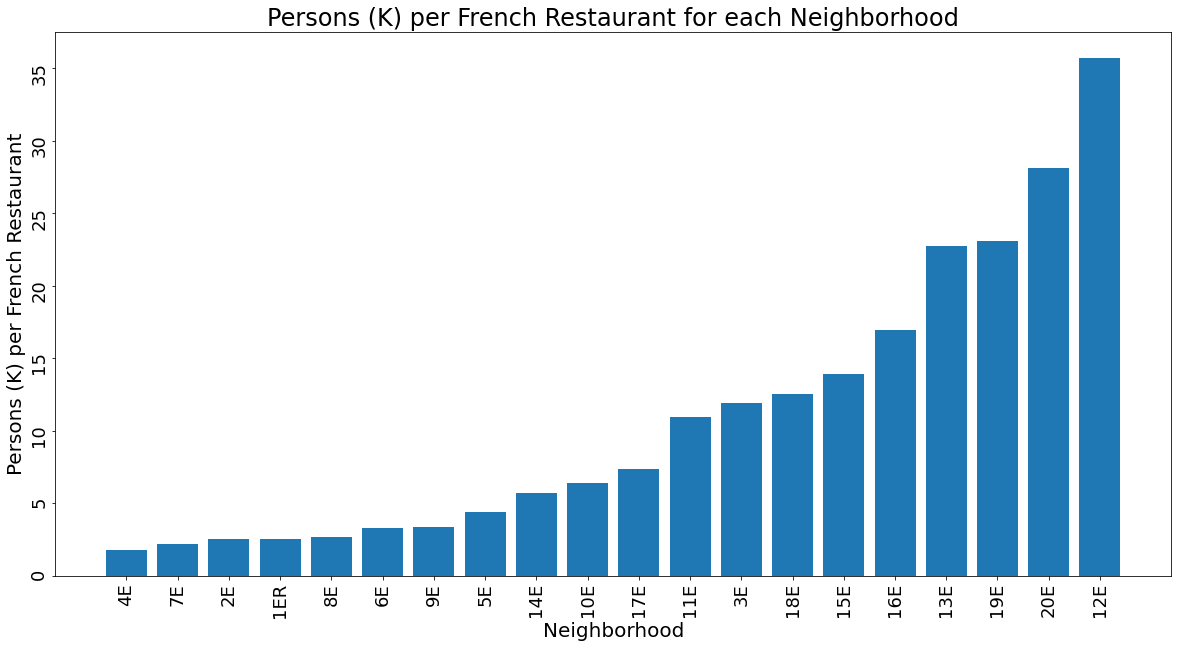

In [99]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(20,10))

plt.bar(person_venue['Neighborhood Number'], person_venue['Persons per Venue'],)

plt.ylabel('Persons (K) per French Restaurant', size= 20)
plt.xlabel('Neighborhood', size= 20)
plt.title('Persons (K) per French Restaurant for each Neighborhood', size= 24)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18, rotation=90)

plt.show()